## Title: Mid Exams
## Name: Faith Jeptoo
## Date: 23 October 2025
## Descreption: Test from week one to week five

# Part 1: Data Parsing

In [ ]:
# Import necessary libraries
import pandas as pd
import re

Step 1: Splitting the Data

The dataset is stored in a single string, where each car's information is separated by a semicolon (`;`).
We will split the text into smaller chunks, each representing one car.

In [ ]:
data = "brand: Ford, model: F-150, model_year: 2023, milage: 2,823 mi., price: 45000; brand: BMW, model: 740 iL, model_year: 2001, milage: 242,000 mi., price: 8500; brand: Tesla, model: Model X, model_year: 2020, milage: 34,000 mi., price: 75000"

Step 2: Extract Key Information

For each car entry:
- Split the details into key-value pairs using commas.
- Extract values for brand, model, model_year, milage, and price.
- Clean mileage and price by removing non-numeric characters.


In [ ]:
# Split the text string into a list of cars
cars = data.split(';')

# Initialize a list to hold cleaned data
car_list = []

# Display separated car entries
print(cars)

['brand: Ford, model: F-150, model_year: 2023, milage: 2,823 mi., price: 45000', ' brand: BMW, model: 740 iL, model_year: 2001, milage: 242,000 mi., price: 8500', ' brand: Tesla, model: Model X, model_year: 2020, milage: 34,000 mi., price: 75000']


Step 3: Create a pandas DataFrame

Now that the data has been cleaned and structured, we will load it into a pandas DataFrame for easier viewing and analysis.


In [ ]:
for car in cars:
    if car.strip():  # skip empty parts
        # Convert the text into key-value pairs
        details = dict(item.strip().split(': ', 1) for item in car.split(', ') if ': ' in item)

                # Clean and convert fields
        brand = details.get('brand', '').strip()
        model = details.get('model', '').strip()
        model_year = int(details.get('model_year', '0').strip())

        # Remove commas and non-digit characters in mileage
        milage = re.sub(r'[^\d]', '', details.get('milage', '0'))
        milage = int(milage)

        # Convert price to integer
        price = int(details.get('price', '0').strip())

        # Append cleaned record
        car_list.append({
            'brand': brand,
            'model': model,
            'model_year': model_year,
            'milage': milage,
            'price': price
        })

In [ ]:
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(car_list)

# Display the structured data
df

,brand,model,model_year,milage,price
0,Ford,F-150,2023,2823,45000
1,BMW,740 iL,2001,242000,8500
2,Tesla,Model X,2020,34000,75000
3,Ford,F-150,2023,2823,45000
4,BMW,740 iL,2001,242000,8500
5,Tesla,Model X,2020,34000,75000


# Part 2: Data Wrangling & Preparation

Step 1: Load and Explore the Dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import re
from google.colab import files

In [ ]:
# Upload CSV file
print("Please upload your used_cars.csv file:")
uploaded = files.upload()

Please upload your used_cars.csv file:


Saving used_cars.csv to used_cars.csv


In [ ]:
# Load dataset
df = pd.read_csv('used_cars.csv')

# Display first 10 rows
display(df.head(10))

# Show dataset structure
df.info()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


Step 2: Cleaning the `milage` Column

In [ ]:
# Remove commas and " mi." from the milage column, then convert to numeric
df['milage'] = df['milage'].str.replace(',', '', regex=False)
df['milage'] = df['milage'].str.replace(' mi.', '', regex=False)
df['milage'] = pd.to_numeric(df['milage'], errors='coerce')

# Confirm cleaning
df['milage'].head()

,milage
0,51000
1,34742
2,22372
3,88900
4,9835


Step 3: Converting the `accident` Column

In [ ]:
# Normalize text and check for 'accident' keyword
df['accident'] = df['accident'].astype(str).str.lower().str.contains('accident')

# Convert boolean to integer (1 = True, 0 = False)
df['accident'] = df['accident'].astype(int)

# Verify conversion
df['accident'].value_counts()

,count
accident,
0,4009


Step 4: Creating the `car_age` Column

In [ ]:
current_year = 2025
df['car_age'] = current_year - df['model_year']

# Display model year vs. age
df[['model_year', 'car_age']].head()

,model_year,car_age
0,2013,12
1,2021,4
2,2022,3
3,2015,10
4,2021,4


Step 5: Extracting Horsepower

In [ ]:
# Extract numeric horsepower value before 'HP'
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)\s*HP')

# Convert to numeric and handle missing values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Fill missing horsepower with median value
median_hp = df['horsepower'].median()
df['horsepower'].fillna(median_hp, inplace=True)

# Preview result
df[['engine', 'horsepower']].head()

/tmp/ipython-input-821257695.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(median_hp, inplace=True)


,engine,horsepower
0,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,300.0
1,3.8L V6 24V GDI DOHC,310.0
2,3.5 Liter DOHC,310.0
3,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,354.0
4,2.0L I4 16V GDI DOHC Turbo,310.0


In [ ]:
# Final dataset check
df.info()

# Preview cleaned data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   int64  
 4   fuel_type     3839 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   int64  
 10  clean_title   3413 non-null   object 
 11  price         4009 non-null   object 
 12  car_age       4009 non-null   int64  
 13  horsepower    4009 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 438.6+ KB


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,horsepower
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,0,Yes,"$10,300",12,300.0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,0,Yes,"$38,005",4,310.0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,0,NaN,"$54,598",3,310.0
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,0,Yes,"$15,500",10,354.0
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,0,NaN,"$34,999",4,310.0


# Part 3: Exploratory Data Analysis (EDA)

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style
sns.set(style="whitegrid", palette="muted")

# Ensure all plots display inline
%matplotlib inline

#### Step 1: Univariate Analysis

We analyze the distribution of:
- **Price** – to understand general pricing patterns.
- **Milage** – to check for outliers or extreme values.

Price Distribution

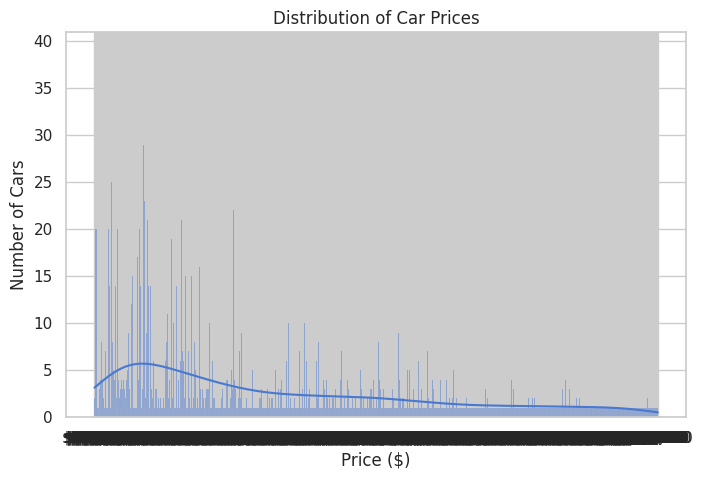

In [ ]:
# Histogram of Car Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Cars')
plt.show()

### Observations:
- The histogram shows how car prices are distributed — typically skewed right, meaning more affordable cars dominate the dataset.
- The mileage boxplot highlights potential outliers — cars with extremely high mileage compared to the majority.

Mileage Outliers

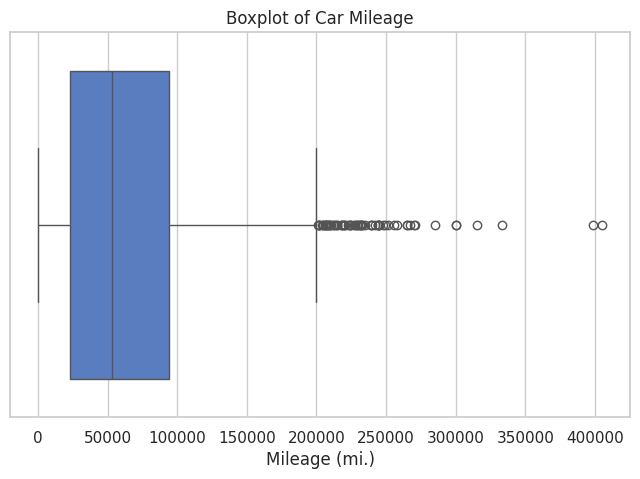

In [ ]:
# Boxplot for Mileage
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['milage'])
plt.title('Boxplot of Car Mileage')
plt.xlabel('Mileage (mi.)')
plt.show()

#### Step 2: Bivariate Analysis

Here, we explore how the target variable **price** relates to other features:
- Mileage vs Price  
- Accident history vs Price  
- Fuel type vs Price

Mileage vs Price

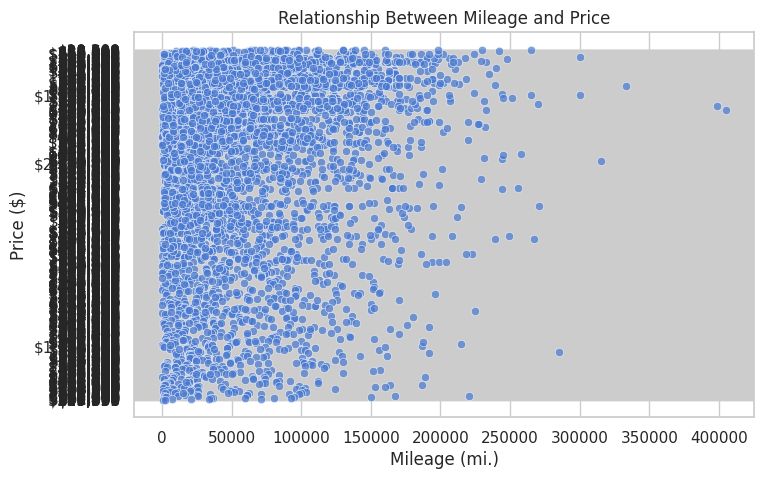

In [ ]:
# Scatter Plot: Mileage vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='milage', y='price', data=df, alpha=0.7)
plt.title('Relationship Between Mileage and Price')
plt.xlabel('Mileage (mi.)')
plt.ylabel('Price ($)')
plt.show()

Accident vs Price

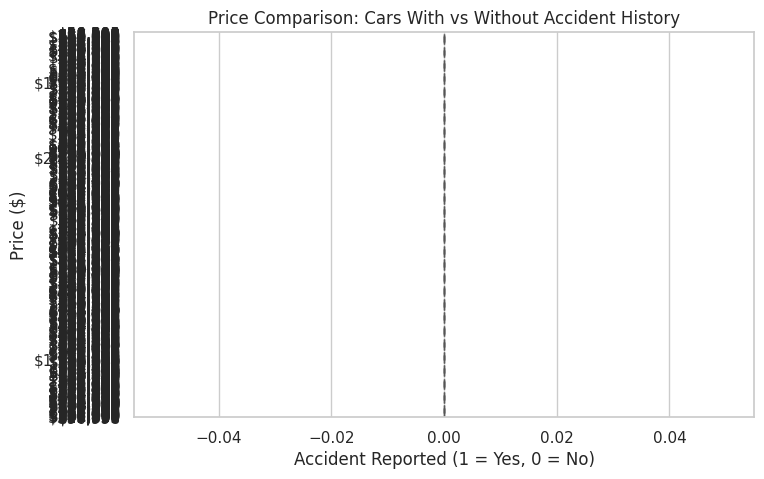

In [ ]:
# Boxplot: Accident vs Price
plt.figure(figsize=(8, 5))
sns.boxplot(x='accident', y='price', data=df)
plt.title('Price Comparison: Cars With vs Without Accident History')
plt.xlabel('Accident Reported (1 = Yes, 0 = No)')
plt.ylabel('Price ($)')
plt.show()

Fuel Type vs Price

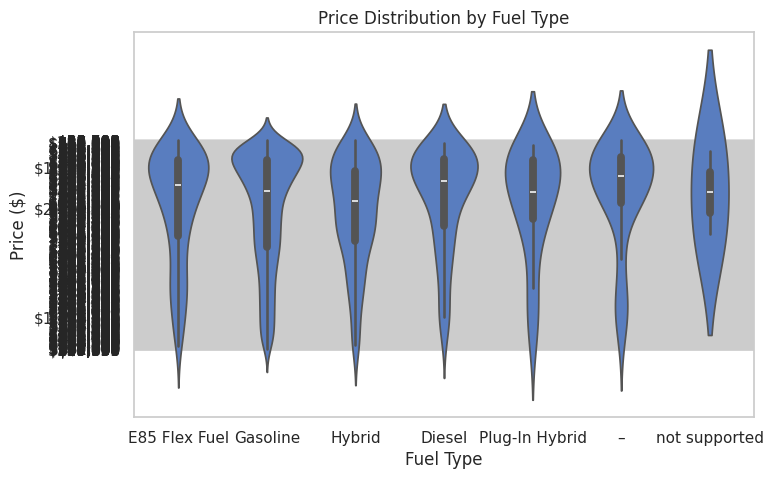

In [ ]:
# Violin Plot: Fuel Type vs Price
plt.figure(figsize=(8, 5))
sns.violinplot(x='fuel_type', y='price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price ($)')
plt.show()

#### Observations:
- **Mileage vs Price:** There appears to be a negative correlation — higher mileage generally leads to lower car prices.
- **Accident vs Price:** Cars with reported accidents have a lower median price compared to those without.
- **Fuel Type vs Price:** Certain fuel types (like electric or hybrid) tend to command higher prices, reflecting newer technologies and higher demand.

### Step 3: Summary of Insights

Based on the EDA, we can draw the following insights:

1. **Mileage Impacts Price Negatively:**  
   There is a clear downward trend showing that cars with higher mileage tend to have lower resale prices.  
   This reflects wear and tear depreciation over time.

2. **Accident History Reduces Value:**  
   Cars with reported accidents are typically valued lower — indicating customers are cautious about vehicle condition and safety history.

3. **Fuel Type Influences Market Value:**  
   Electric and hybrid cars generally have higher prices compared to traditional gasoline vehicles, likely due to technology costs and fuel efficiency.

### Conclusion:
Understanding these relationships helps dealerships set competitive prices, identify undervalued cars, and guide customer purchasing decisions effectively.


Correlation Heatmap

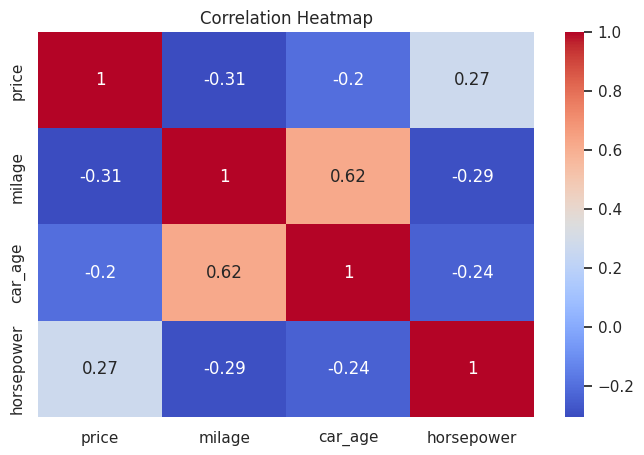

In [ ]:
# Clean and convert price to numeric
df['price'] = df['price'].astype(str).str.replace('[$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Optional: Correlation heatmap to show relationships numerically
plt.figure(figsize=(8, 5))
sns.heatmap(df[['price', 'milage', 'car_age', 'horsepower']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()